In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import quandl
%matplotlib inline
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib import style

style.use('ggplot')

C:\Users\ashis\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
axis_data = quandl.get('NSE/AXISBANK', start_date = '2015-01-01')

In [3]:
axis_data.head(3)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2015-01-01,502.65,504.0,499.05,503.00,503.05,1351985.0,6779.90
2015-01-02,503.20,516.9,501.70,514.55,514.30,3852825.0,19738.87
2015-01-05,516.90,520.4,515.10,516.50,517.55,2561430.0,13262.09


In [4]:
axis_data.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-02-19,537.85,544.95,527.50,541.75,540.55,4251723.0,22703.78
2018-02-20,542.00,548.05,529.40,530.70,531.70,3395183.0,18335.23
2018-02-21,534.00,538.50,524.40,536.00,535.80,4638382.0,24646.81
2018-02-22,533.00,533.75,527.50,529.20,530.25,7808359.0,41413.58
2018-02-23,527.00,538.90,525.55,537.50,536.65,3888629.0,20757.56


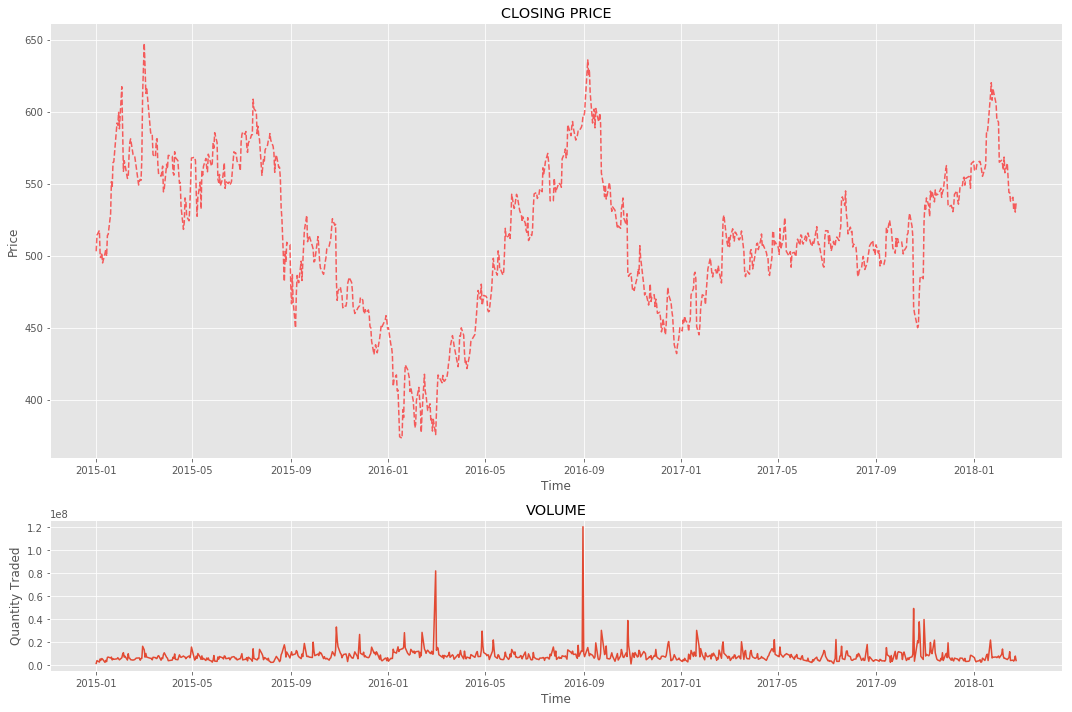

In [309]:
plt.figure(figsize = (15,10))

ax1 = plt.subplot2grid((10,10),(0,0), rowspan = 7,colspan =10)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('CLOSING PRICE')

ax2 = plt.subplot2grid((10,10),(7,0),rowspan = 3, colspan = 10)
plt.xlabel('Time')
plt.ylabel('Quantity Traded')
plt.title('VOLUME')

ax1.plot(axis_data['Close'], linestyle = '--',color = 'r', alpha = 0.6)
ax2.plot(axis_data['Total Trade Quantity'])

ax1.grid(True)
ax2.grid(True)


plt.tight_layout()
plt.show()

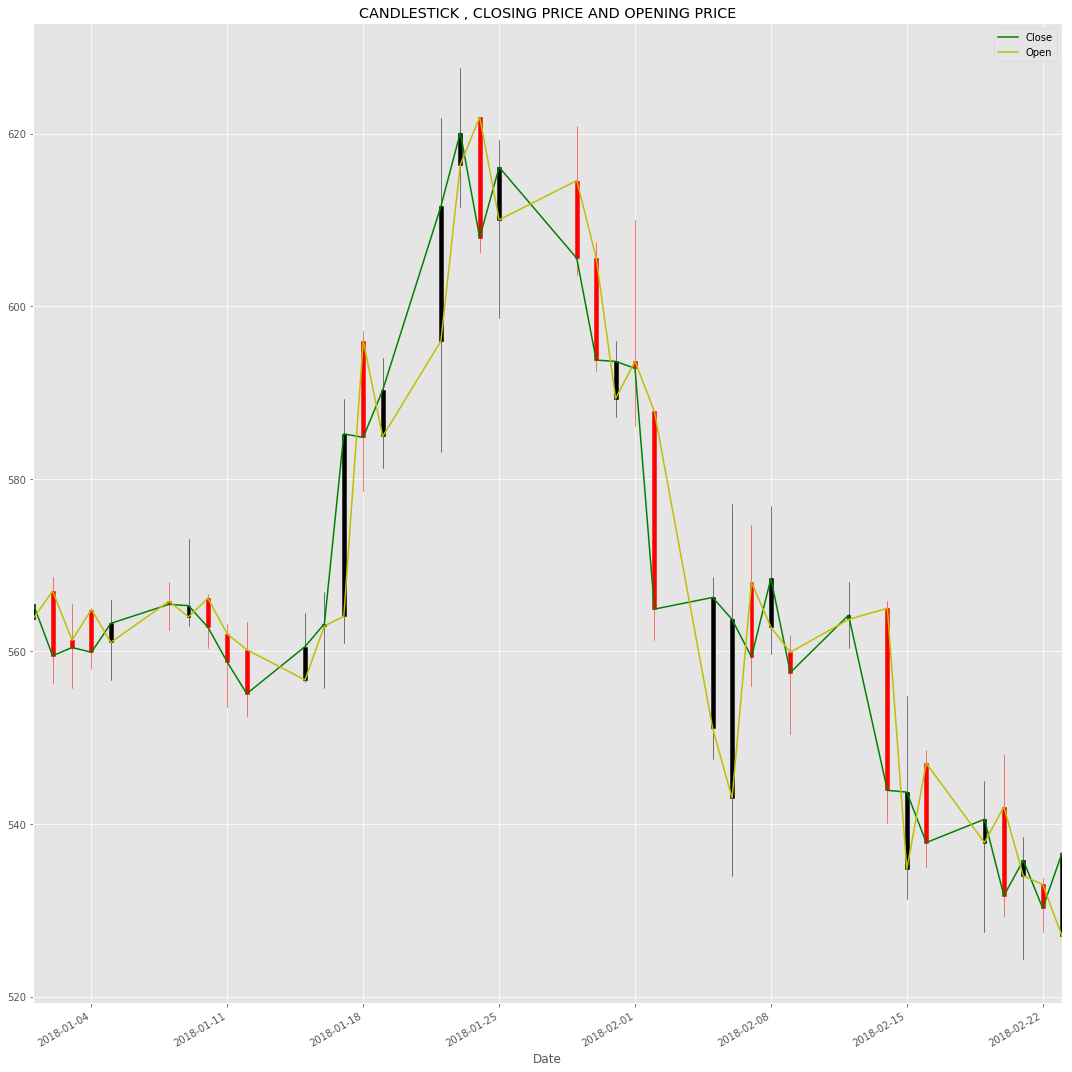

In [310]:
ohlc = axis_data.loc['2018'][['Open','High','Low','Close']]
ohlc.reset_index(inplace = True)
ohlc['Date'] = ohlc['Date'].map(mdates.date2num)


fig = plt.figure(figsize = (15,15))
ax1 = fig.subplots()


for label in ax1.get_xticklabels():
    label.set_rotation(45)

ax1.xaxis_date()
ax1.grid(True)
candlestick_ohlc(ax1,ohlc.values)

axis_data.loc['2018']['Close'].plot(legend = True, grid = True, color = 'g')
axis_data.loc['2018']['Open'].plot(legend = True, grid = True, color = 'y')
plt.title('CANDLESTICK , CLOSING PRICE AND OPENING PRICE')
plt.tight_layout()
plt.show()

In [13]:
axis_data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,781.000000,781.000000,781.000000,781.000000,781.000000,7.810000e+02,781.000000
mean,513.392766,519.715173,506.282650,512.806466,512.777465,8.367079e+06,42391.723111
std,51.842046,52.354211,51.096955,51.758848,51.718212,6.841640e+06,35327.954711
min,372.250000,383.350000,366.750000,372.850000,373.200000,9.377010e+05,4581.790000
25%,482.900000,488.050000,474.200000,480.800000,481.450000,5.258296e+06,26882.080000
50%,513.100000,518.700000,506.700000,512.950000,512.900000,6.988719e+06,36002.850000
75%,553.000000,559.200000,545.400000,552.100000,551.800000,9.743637e+06,48139.760000
max,650.900000,654.900000,628.700000,650.000000,647.550000,1.205419e+08,717955.040000


In [14]:
moving_averages = [21,42,100]

for num in moving_averages:
    def moving(num):
        return(axis_data['Close'].rolling(num).mean())
    axis_data['MA {}'.format(num)] = moving(num)
    
axis_data['Volatility'] = axis_data['Close'].rolling(21).std()


In [15]:
axis_data.head(3)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),MA 21,MA 42,MA 100,Volatility
Date,,,,,,,,,,,
2015-01-01,502.65,504.0,499.05,503.00,503.05,1351985.0,6779.90,NaN,NaN,NaN,NaN
2015-01-02,503.20,516.9,501.70,514.55,514.30,3852825.0,19738.87,NaN,NaN,NaN,NaN
2015-01-05,516.90,520.4,515.10,516.50,517.55,2561430.0,13262.09,NaN,NaN,NaN,NaN


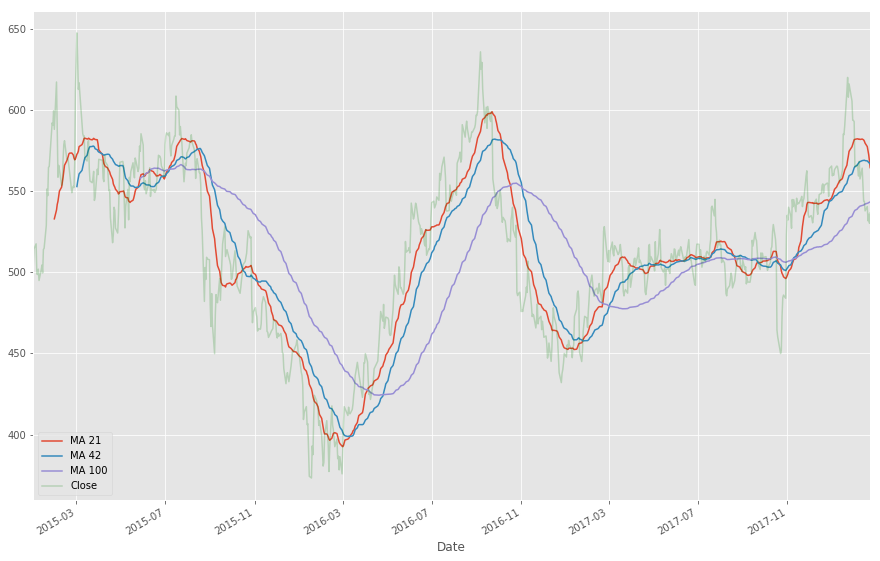

In [312]:
axis_data.loc[:,['MA 21', 'MA 42','MA 100']].plot(figsize  =(15,10))
axis_data['Close'].plot(alpha = 0.2, figsize = (15,10),legend = True, color = 'g')

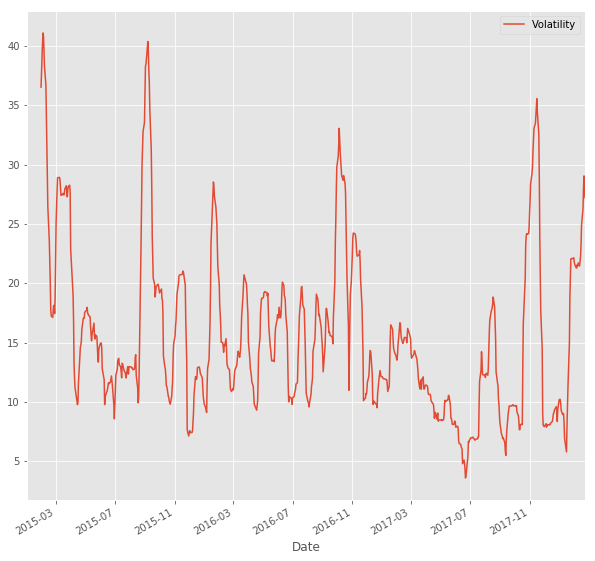

In [313]:
axis_data['Volatility'].plot(figsize = (10,10), legend = True, grid = True)

In [18]:
axis_data['Pct_change'] = axis_data['Close'].pct_change()

In [19]:
axis_data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),MA 21,MA 42,MA 100,Volatility,Pct_change
Date,,,,,,,,,,,,
2015-01-01,502.65,504.00,499.05,503.00,503.05,1351985.0,6779.90,NaN,NaN,NaN,NaN,NaN
2015-01-02,503.20,516.90,501.70,514.55,514.30,3852825.0,19738.87,NaN,NaN,NaN,NaN,0.022364
2015-01-05,516.90,520.40,515.10,516.50,517.55,2561430.0,13262.09,NaN,NaN,NaN,NaN,0.006319
2015-01-06,513.55,513.55,496.75,498.50,499.05,5284530.0,26584.93,NaN,NaN,NaN,NaN,-0.035745
2015-01-07,498.80,505.35,494.50,501.00,498.65,4245189.0,21212.71,NaN,NaN,NaN,NaN,-0.000802


In [20]:
axis_data['Pct_change'].describe()

count    780.000000
mean       0.000272
std        0.019464
min       -0.094807
25%       -0.010149
50%        0.000041
75%        0.009724
max        0.080888
Name: Pct_change, dtype: float64

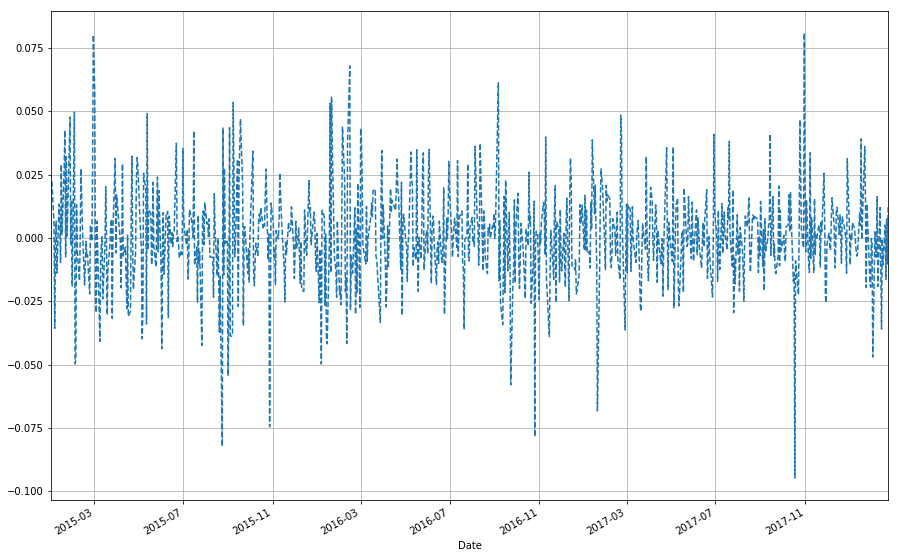

In [21]:
axis_data['Pct_change'].plot(figsize = (15,10),linestyle = '--', grid = True)

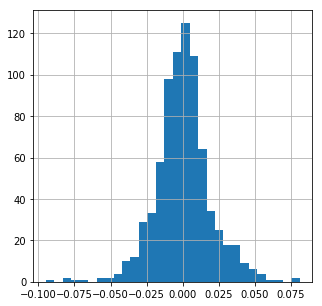

In [22]:
axis_data['Pct_change'].hist(bins = 30,figsize = (5,5))

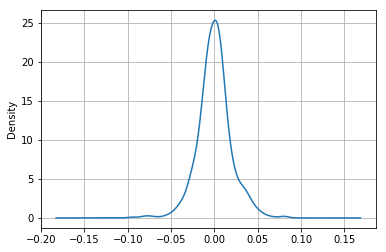

In [23]:
axis_data['Pct_change'].plot(kind = 'kde',grid = True)

In [24]:
axis_data['Cum_return'] = (1 + axis_data['Pct_change']).cumprod()

In [25]:
axis_data.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),MA 21,MA 42,MA 100,Volatility,Pct_change,Cum_return
Date,,,,,,,,,,,,,
2015-01-01,502.65,504.00,499.05,503.00,503.05,1351985.0,6779.90,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,503.20,516.90,501.70,514.55,514.30,3852825.0,19738.87,NaN,NaN,NaN,NaN,0.022364,1.022364
2015-01-05,516.90,520.40,515.10,516.50,517.55,2561430.0,13262.09,NaN,NaN,NaN,NaN,0.006319,1.028824
2015-01-06,513.55,513.55,496.75,498.50,499.05,5284530.0,26584.93,NaN,NaN,NaN,NaN,-0.035745,0.992049
2015-01-07,498.80,505.35,494.50,501.00,498.65,4245189.0,21212.71,NaN,NaN,NaN,NaN,-0.000802,0.991253


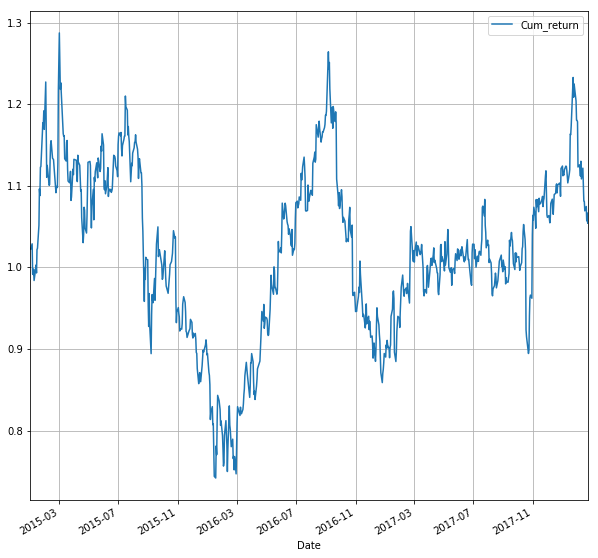

In [30]:
axis_data['Cum_return'].plot(figsize = (10,10),grid = True,legend = True)
